In [53]:
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [33]:
dataset_path=keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [34]:
dataset_path

'./datasets/flower_photos'

In [35]:
tf_dataset=tf.data.Dataset.list_files(dataset_path+"/*/*",shuffle=False)

In [36]:
for img in tf_dataset.take(2):
  print(img)

tf.Tensor(b'./datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg', shape=(), dtype=string)
tf.Tensor(b'./datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg', shape=(), dtype=string)


In [37]:
def get_labels(file_path):
  return tf.strings.split(file_path,os.path.sep)[-2]

In [38]:
for img in tf_dataset.map(get_labels).take(2):
  print(img)

tf.Tensor(b'daisy', shape=(), dtype=string)
tf.Tensor(b'daisy', shape=(), dtype=string)


In [39]:
def get_labels_img(file_path):
  lables=get_labels(file_path)
  img=tf.io.read_file(file_path)
  decode_img=tf.image.decode_jpeg(img)
  decode_img_resize=tf.image.resize(decode_img,(180,180))
  return decode_img_resize,lables

In [40]:
for img in tf_dataset.map(get_labels_img).take(1):
  print(img)

(<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[134.16667 , 136.16667 , 133.16667 ],
        [140.5     , 142.5     , 139.5     ],
        [144.67114 , 146.67114 , 145.12453 ],
        ...,
        [153.94443 , 153.94443 , 151.94443 ],
        [152.3588  , 152.3588  , 150.3588  ],
        [150.5813  , 150.5813  , 148.5813  ]],

       [[133.475   , 135.475   , 131.62962 ],
        [139.80833 , 141.80833 , 138.80833 ],
        [143.90602 , 145.90602 , 142.90602 ],
        ...,
        [153.94443 , 153.94443 , 151.94443 ],
        [152.4236  , 152.4236  , 150.4236  ],
        [149.41942 , 149.41942 , 147.41942 ]],

       [[133.0139  , 134.0139  , 129.0139  ],
        [140.34723 , 141.18056 , 136.68056 ],
        [143.79167 , 143.79167 , 141.79167 ],
        ...,
        [152.88885 , 152.88885 , 150.88885 ],
        [150.87268 , 150.87268 , 148.87268 ],
        [145.64272 , 145.64272 , 143.64272 ]],

       ...,

       [[ 43.94059 ,  47.94059 ,  24.94059 ],
        [ 43

In [41]:
training_size=round((len(tf_dataset))*0.8)

In [42]:
train_ds=tf_dataset.take(training_size)
test_ds=tf_dataset.skip(training_size)

In [43]:
len(train_ds),len(test_ds)

(2936, 734)

In [44]:
train_ds=train_ds.map(get_labels_img)
test_ds=test_ds.map(get_labels_img)

In [49]:
x_train,y_train=[],[]
for image,label in train_ds:
  x_train.append(image.numpy())
  y_train.append(label.numpy())

In [51]:
x_test,y_test=[],[]
for image,label in test_ds:
  x_test.append(image.numpy())
  y_test.append(label.numpy())

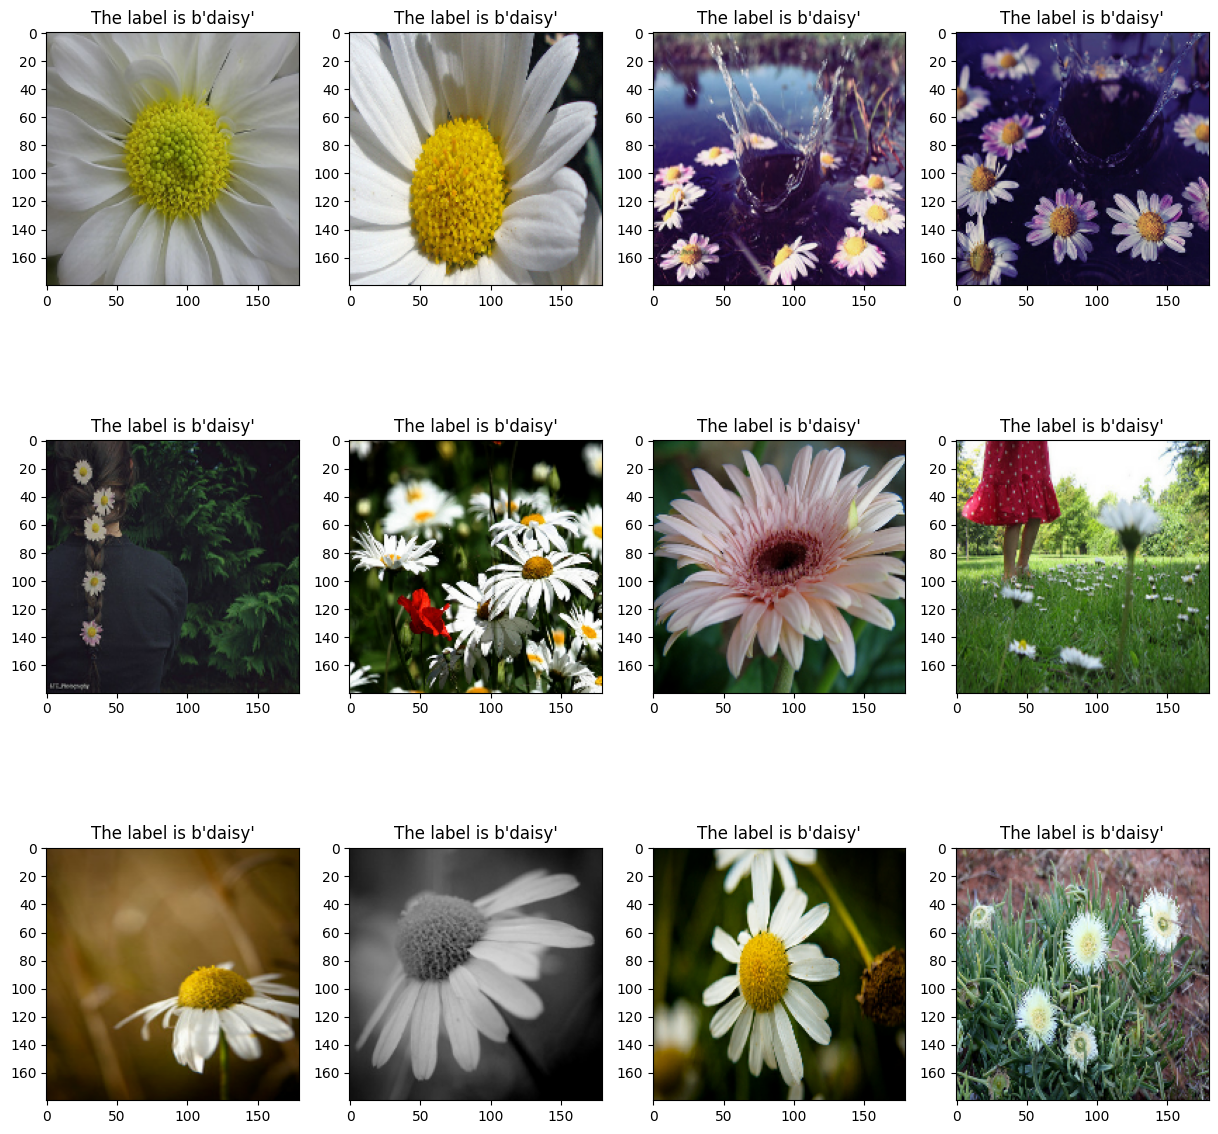

In [58]:
plt.figure(figsize=(15,15))
for i in range(12):
  ax=plt.subplot(3,4,i+1)
  plt.title(f"The label is {y_train[i]}")
  plt.imshow(x_train[i].astype("uint8"))